<a href="https://colab.research.google.com/github/itc202/praktik/blob/main/FastSAM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Документация и про параметры использования-инференса (сегментации)
https://docs.ultralytics.com/models/fast-sam/#installation

Зауск инференса без последнего параметра выводит список взможных параметров для сегментирования


In [ ]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1171, done.
remote: Counting objects: 100% (645/645), done.
remote: Compressing objects: 100% (484/484), done.
remote: Total 1171 (delta 179), reused 576 (delta 153), pack-reused 526
Receiving objects: 100% (1171/1171), 72.45 MiB | 36.67 MiB/s, done.
Resolving deltas: 100% (453/453), done.


In [ ]:
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2023-09-20 15:06:09--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 65.8.178.27, 65.8.178.93, 65.8.178.118, ...
Connecting to huggingface.co (huggingface.co)|65.8.178.27|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1695481569&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5NTQ4MTU2OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2UtY29u

In [ ]:
!pip install -r FastSAM/requirements.txt
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine

In [ ]:
#!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
!wget -P images https://elport.ru/Time_data_set/klubniki.jpg

--2023-09-20 15:06:48--  https://elport.ru/Time_data_set/klubniki.jpg
Resolving elport.ru (elport.ru)... 194.67.86.79
Connecting to elport.ru (elport.ru)|194.67.86.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434469 (424K) [image/jpeg]
Saving to: ‘images/klubniki.jpg’

klubniki.jpg        100%[===================>] 424.29K   382KB/s    in 1.1s    

2023-09-20 15:06:50 (382 KB/s) - ‘images/klubniki.jpg’ saved [434469/434469]



In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = cv2.imread('images/klubniki.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

1536 1152


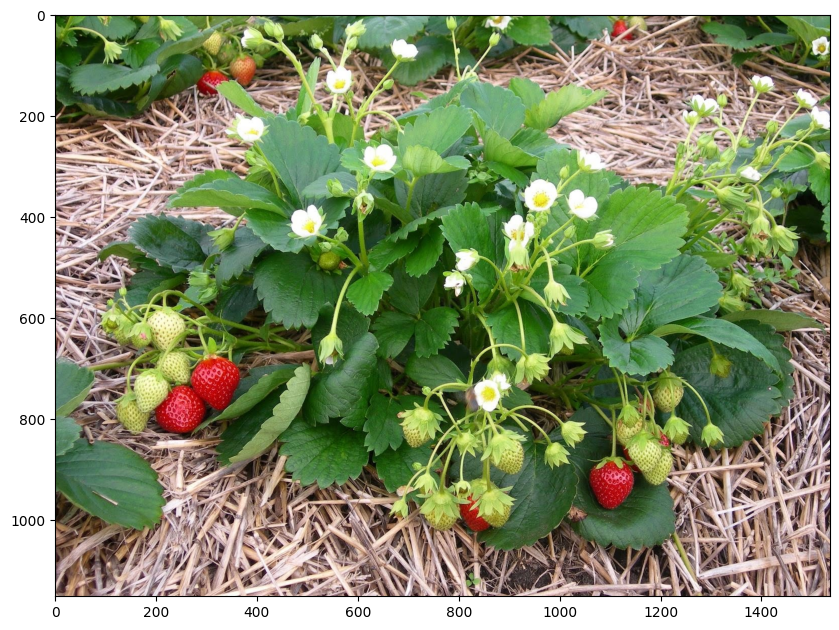

In [ ]:
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.imshow(image)

"--imgsz 1024" means the input image size is 1024. Our model was trained on a size of 1024. You can change it to any size you want to input. Using other sizes would produce different segmentation results.

In [ ]:
!python FastSAM/Inference.py  --model_path FastSAM.pt --img_path ./images/klubniki.jpg --imgsz 1024


0: 768x1024 126 objects, 12691.5ms
Speed: 63.6ms preprocess, 12691.5ms inference, 6991.2ms postprocess per image at shape (1, 3, 1024, 1024)


1536 1152


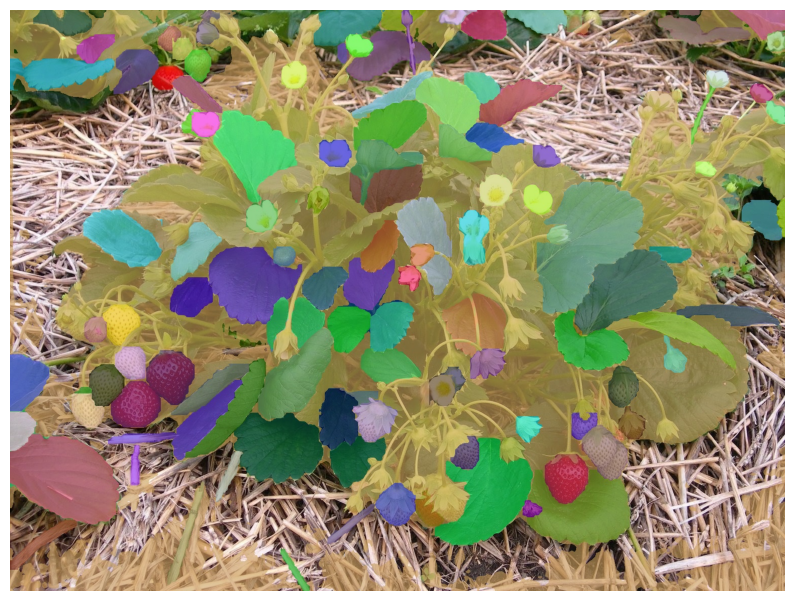

In [ ]:
image = cv2.imread('output/klubniki.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [ ]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path ./images/klubniki.jpg --box_prompt #"[570,200,230,400]"

usage: Inference.py
       [-h]
       [--model_path MODEL_PATH]
       [--img_path IMG_PATH]
       [--imgsz IMGSZ]
       [--iou IOU]
       [--text_prompt TEXT_PROMPT]
       [--conf CONF]
       [--output OUTPUT]
       [--randomcolor RANDOMCOLOR]
       [--point_prompt POINT_PROMPT]
       [--point_label POINT_LABEL]
       [--box_prompt BOX_PROMPT]
       [--better_quality BETTER_QUALITY]
       [--device DEVICE]
       [--retina RETINA]
       [--withContours WITHCONTOURS]
Inference.py: error: argument --box_prompt: expected one argument


In [ ]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path ./images/klubniki.jpg --text_prompt 'green berries'


0: 768x1024 126 objects, 15380.5ms
Speed: 15.6ms preprocess, 15380.5ms inference, 4866.6ms postprocess per image at shape (1, 3, 1024, 1024)


1536 1152


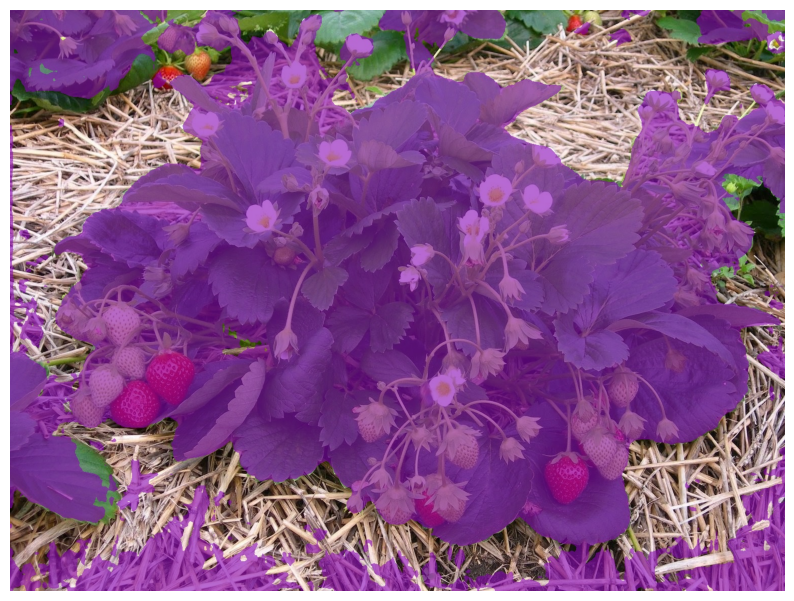

In [ ]:
image = cv2.imread('output/klubniki.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)